> <font color="#c41f3b"> **NOTE** </font> : please read the paper associated with this social media analytics (SMA) pipeline for more details.

* Also try to be very patient when running the cells within this 
notebook, as some take long time.




# Preparation


---



## Library installation/import

Install and import libraries used in this SMA Pipeline.

<font color="#c41f3b"> **NOTE**: </font> you need to rerun this cell after running it for the first time, since some libries require refreshing the kernal.

In [1]:
# Python library for accessing the Twitter API
!pip install tweepy

# Python libraries used remove emojis
!pip install emoji
!pip install demoji

# Python library that take a number of bytes and return human-readable string
!pip install hurry.filesize

# Python library used to calculate statistics from text
!pip install textstat

# Python library for topic modelling
!pip install -U gensim

# Python library for interactive topic model visualization 
# i.e. Visualise the topics
!pip install pyldavis

# Python library for VADER sentiment analysis tool
!pip install vaderSentiment

Requirement already up-to-date: gensim in /usr/local/lib/python3.7/dist-packages (4.0.0)


In [3]:
# Python Standard Libraries
import string
import re
import os
import sys
import time
import json
import codecs

# Warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Text manipultation
import textstat

# For file utilities
from hurry.filesize import size as fileSize
from hurry.filesize import alternative
from hurry.filesize import verbose
from hurry.filesize import si

import glob

# Natural Language tool kit
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet

# For topic modelling
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel

from pprint import pprint

# For topic modelling visualisation
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 

# For sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Word cloud
from wordcloud import WordCloud

# For emojis
import emoji
import demoji

# Scientific computing (arrays, matries, series)
import numpy as np
import pandas as pd

# To access Twitter API
import tweepy

# Visualization
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure 
%matplotlib inline 

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
demoji.download_codes()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
... OK (Got response in 0.16 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK


## Data Sources (Configure Twitter API keys)

Please note that the API keys below belong to the authors of this software. Generated on Tue 23 Mar 10:30 am UK time.

<font color="#c41f3b"> **NOTE**: </font> dont run this cell if you dont intend to collect data yourself. 

In [ ]:
consumer_key        = 'oxpDKRI2RovDIFMt5jijaDiZb'
consumer_secret     = 'z6t0f7lqz3Oo309V8CZ18ivvC5tvft45UhwP9cUvyWjuXGbBqn'
access_token        = '1374301227543060480-oWSn6AOu3RuAKQY5G4WrHZw9jwvS5a'
access_token_secret = 'AYEf4TvDCrI0jqV4qOOilAzoTWYyQbj2re4eJLGHS1MoD'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

## Search Patterns

The following contains the search patterns or search operators used to query Twitter, by using various methods, such as keywords, hashtags, username, accounts, downloading tweets using tweet ids.

### Question 1 search patterns

> <font color="#c41f3b"> **NOTE**: </font> All are combined into one file callsed `q1_dataset.csv`

| Query      | CSV File |
| ----------- | ----------- |
| work from home      | work_from_home.csv       |
| working from home   | working_from_home.csv      |
| corona work from home | corona_work_from_home.csv |
| corona working from home | corona_working_from_home.csv |
| #Pajamaday | Pajamaday.csv |
| #remote work | remote_work.csv |
| remote working | remote_working.csv |
| work home | work_home.csv |
| remote job | remote_job.csv |
| #whf | whf.csv |
| home working | home_working.csv |
| #stayathome | stay_at_home.csv |
| zoom meeting | zoom_meeting.csv |
| covid work from home | covid_work_from_home(1).csv |
| covid working from home | covid_working_from_home.csv |
| covid working | covid_working.csv |
| covid workplace | covid_workplace.csv |
| covid19 remote |  covid19_remote.csv |
| covid19 work | covid19_work.csv |
| covid19 working | covid19_working.csv |
| covid19 workplace | covid19_workplace.csv |
| back to work | back_to_work.csv |
| home office| home_office.csv |



### Question 2 search patterns

> <font color="#c41f3b"> **NOTE**: </font> All are combined into one file callsed `q2_dataset.csv`

| Query      | CSV File |
| ----------- | ----------- | 
| coronavirus regulations  | coronavirus_regulations.csv | 
| coronavirus restrictions  | coronavirus_restrictions.csv|
|coronavirus rules| coronavirus_rules.csv|
|covid-19 rules | covid_19_rules.csv|
|Covid 19 rules|Covid_19_Rules_dataset.csv|
|Covid-19 regulations|Covid-19_Regulations_dataset.csv|
|covid-19 alert system|Covid-19_alert_system.csv|
|covid19 lockdown rules |covid19_lockdown_rules.csv|
|covid alert system |Covid_alert_system.csv|
|covid lockdown rules|covid_lockdown_rules.csv|
|covid regulations|Covid_regulations.csv|
|covid restrictions|covid_restrictions.csv|
|covid rules|covid_rules.csv|
|#covid AND lockdown rules|#covid_AND_lockdown_rules.csv|
|#covid AND regulations|#covid_AND_regulations.csv|
|#covid AND rules|#covid_AND_rules.csv|
|#covid19 AND rules|#covid19_AND_rules.csv|
|#covid-19 AND rules|#covid-19_rules.csv|
|#lockdown #regulations|#lockdown_#regulations.csv|
|#lockdown #rules|#lockdown_#rules.csv|
|lockdown regulations|Lockdown_Regulations_dataset.csv|
|lockdown rules|lockdown_rules.csv|
|pandemic regulations|pandemic_regulations.csv|
|pandemic rules|pandemic_rules.csv|
|quarantine regulations|Quarantine_regulations.csv|
|quarantine rules|Quarantine_Rules_dataset.csv|
|covid|dataset__covid.csv|
|#covid AND regulations|dataset_0.csv|
|#covid AND lockdown rules|dataset_1.csv |
|#covid19 AND tiered system|dataset_2.csv |
|covid AND quarantine rules|dataset_3.csv |
|covid AND '"reduce the spread"'|dataset_4.csv |
|covid AND regulations OR strategies for lockdown|dataset_5.csv |
|covid OR corona OR coronavirus AND regulations OR strategies for lockdown|dataset_6.csv |
|alert system AND covid OR corona OR coronavirus OR covid19|dataset_7.csv |
|covid19 restrictions|dataset_8.csv |
|COVID-19 regulations|dataset_9.csv |
|Covid Regulations|dataset_10.csv|
|Coronavirus|dataset_11.csv |
|Panic buying OR  DuringMy14DayQuarantine  OR Panic shopping  OR InMyQuarantineSurvivalKit|dataset_12.csv |
|#lockdown #covid|dataset_13.csv |
|CovidGuidance|dataset_14.csv |
|@NHSuk|dataset_15.csv |
|Covid Restrictions|dataset_16.csv |
|anti-lockdown|dataset_17.csv|
|for breaching COVID regulations during lockdown|dataset_18.csv |
|Alert System AND covid|dataset_19.csv|
|UK alert system|dataset_20.csv |
|#Covid19 Panic buying|dataset_21.csv |
|panic buying|dataset_22.csv |
|SocialDistancing|dataset_23.csv|
||dataset_24.csv|
|covid19 #lockdown|dataset_25.csv|
|#ProtectEveryone AND covid OR coronavirus|dataset_26.csv |
|covid restrictions|dataset_27.csv |
|covid19 Regulations|dataset_28.csv |
|covid19 lockdown rules|dataset_29.csv |
|#covid AND lockdown rules|dataset_30.csv |
|national lockdown|dataset_31.csv |
|England lockdown rules|dataset_32.csv |
|quarantine regulations|dataset_33.csv |
|coronavirus strategies|dataset_34.csv |
|Coronavirus rules|dataset_35.csv |
|reduce the spread|dataset_36.csv |
|#StaySafe #COVID19|dataset_37.csv |
|||
|wear mask|dataset_39.csv |
|#lockdown2|ataset_40.csv |
|lockdown tiered system|dataset_42.csv |
|#washyourhands|dataset_43.csv |
|#selfisolating|dataset_44.csv |
|self isolating|dataset_45.csv |
|social distancing|dataset_46.csv|
|#stayhomestaysafe|dataset_47.csv|
|wear a mask|dataset_48.csv |
|#covid19 policies|dataset_49.csv |
|#covid19 rules|dataset_50.csv|
|covid rules|dataset_51.csv |
|follow social distancing|dataset_52.csv |
|#stayhome|dataset_53.csv |
|#flattenthecurve|dataset_54.csv |
|#hometasking|dataset_55.csv |
|#quarantine|dataset_56.csv |
|wear mask|dataset_57.csv |
|#stayathome|dataset_58.csv |
|Corona prevention|dataset_59.csv |
|lockdown2021|dataset_60.csv |
|#wellnesscheck|dataset_61.csv |
|#TemperatureChecks|dataset_62.csv |
|lockdown :)|dataset_64.csv |
|lockdown :( |dataset_65.csv |
|borisjohnson|borisjohnson.csv|
||dataset_47_ids.csv|



### Question 3 search patterns

> <font color="#c41f3b"> **NOTE**: </font> All are combined into one file callsed `q3_dataset.csv`

| Query      | CSV File |
| ----------- | ----------- | 
|lockdown|dataset_lockdown.csv|
|anti-lockdown|dataset_anti-lockdown.csv|
|lockdown :)| dataset_lockdown _).csv|
|lockdown :(| dataset_lockdown _(.csv|
|covid AND lockdown| dataset_covid AND lockdown.csv|
|lockdown2021| dataset_lockdown2021.csv|
|quarantine| dataset_quarantine.csv|
|#wfh| dataset_#wfh.csv|
|stayhome| dataset_stayhome.csv|
|selfisolating|dataset_selfisolating.csv|
|workingfromhome| dataset_workingfromhome.csv|


## Loading/Downloading of datasets


---


> <font color="#c41f3b"> **NOTE**: </font> The following two cells contain functions that are used in data collection stage, might not needed for replication of results since datasets already have been provided, nevetheless for reference we include them here. 

In [ ]:
def load_file(path, encoding="ISO-8859-16"):
    try:
        file = codecs.open(path, mode='r', encoding=encoding)
        data_list = file.readlines()
        file.close()
        return data_list
    except FileNotFoundError:
        print(f"file {path} not found", file=sys.stderr)
        exit(-1)

In [ ]:
# Search by one or more keywords or hashtags (search patterns)
def search_twitter_by_query(query, max_tweets, api_info, file_path, start_date, end_date):

  auth = tweepy.OAuthHandler( api_info['API_KEY'], api_info['API_SECRET'] )
  auth.set_access_token( api_info['ACCESS_TOKEN'],  api_info['ACCESS_TOKEN_SECRET'] )
  api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

  try:
    tweets = tweepy.Cursor(api.search, q=query +' -filter:retweets',
                           lang="en", since=start_date, until=end_date,
                           tweet_mode='extended').items(max_tweets)
  except KeyboardInterrupt:
    print('keyboard interrupt')
  except:
    pass

  tweets_list = [
                 [tweet.created_at,                                             # Date
                  tweet.user.screen_name,                                       # Userame
                  tweet.user.location,                                          # Location
                  tweet.full_text.replace('\n', ' '),                           # Tweet post text
                  [e['text'] for e in tweet._json['entities']['hashtags']],     # Hashtags
                  tweet.user.followers_count] for tweet in tweets               # Number of Followers
  ]

  tweets_df = pd.DataFrame(data=tweets_list, columns=['date', 'user', 'location', 'text', 'hastags', 'followers count'] )
  tweets_df.to_csv(file_path, quotechar='"', encoding='utf8', index=False, header=True)
  return tweets_df

 def search_twitter_by_query_v3(query, api_info, file_path, end_date):

  auth = tweepy.OAuthHandler( api_info['API_KEY'], api_info['API_SECRET'] )
  auth.set_access_token( api_info['ACCESS_TOKEN'],  api_info['ACCESS_TOKEN_SECRET'] )
  api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

  tweets = api.search(q=query, lang="en", result_type="mixed", count=200, until=end_date)

  if tweets:
    all_tweets = []
    all_tweets.extend(tweets)
    last_id = tweets[-1].id

    while True:
      try:
        tweets = api.search(q=query +' -filter:retweets',
                            lang="en", result_type="mixed", count=200,
                            until=end_date, max_id=(last_id - 1),
                            tweet_mode="extended")
        if len(tweets) == 0:
          break
        last_id = tweets[-1].id
        all_tweets.extend(tweets)
        print('# of tweets downloaded so far {}'.format(len(all_tweets)))
        
      except KeyboardInterrupt:
        break
      except:
        break

    tweets_list = []
    for t in all_tweets:
      try:
        tweets_list += [ [t.created_at, t.user.screen_name,
                          t.user.location,
                           t.full_text.encode('utf-8').decode('utf-8'),
                          [e['text'] for e in t._json['entities']['hashtags']],     
                          t.user.followers_count] ]
      except:
        tweets_list += [ [t.created_at, t.user.screen_name,
                          t.user.location,
                          t.text.encode('utf-8').decode('utf-8'),
                         
                          [e['text'] for e in t._json['entities']['hashtags']],     
                          t.user.followers_count]] 
  
    tweets_df = pd.DataFrame(data=tweets_list, columns=['date', 'user', 'location', 'text', 'hastags', 'followers count'] )
    tweets_df.to_csv(file_path, quotechar='"', encoding='utf-8', index=False, header=True)
    return tweets_df

# Search by one or more tweet ids from a file containing tweet ids
def search_twitter_by_tweetsids(ids_file_path, max_tweets, api_info, file_path):
  auth = tweepy.OAuthHandler( api_info['API_KEY'], api_info['API_SECRET'] )
  auth.set_access_token( api_info['ACCESS_TOKEN'],  api_info['ACCESS_TOKEN_SECRET'] )

  api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

  # Load the tweets from the id file
  ids_data_list = load_file(ids_file_path)

  filter_tweetids = lambda id: int(id.replace('\n', ''))
  filtered_tweetids = list(map(filter_tweetids, ids_data_list))

  count = 0
  tweets_status = []

  print_index = 0
  for tweet_id in filtered_tweetids:

    if count >= max_tweets:
      break
    try:
      status = api.get_status(tweet_id, tweet_mode='extended')
      # Filter out non-english tweets
      if status.lang == 'en':
        tweets_status.append(status)
        count += 1
        print_index += 1
        
      if print_index > 500:
        print('# of tweets downloaded so far {}'.format(count))
        print_index = 0

    except tweepy.TweepError:
      # print('Failed to run the command on that user, skipping...')
      pass

    except KeyboardInterrupt:
      break
    
  tweets_list = [
                [tweet.created_at,                                            # Date
                tweet.user.screen_name,                                       # Userame
                tweet.user.location,                                          # Location
                tweet.full_text.replace('\n', ' '),                                # Tweet post text
                [e['text'] for e in tweet._json['entities']['hashtags']],     # Hashtags
                tweet.user.followers_count] for tweet in tweets_status        # Number of Followers
  ]


  tweets_df = pd.DataFrame(data=tweets_list, columns=['date', 'user', 'location', 'text', 'hastags', 'followers count'] )

  tweets_df.to_csv(file_path, quotechar='"', encoding='utf8', index=False, header=True)

  return tweets_df

# Search by one or more usernames
def search_twitter_by_usernames(usernames, max_tweets):

  if isinstance(usernames, list):
    option=1
    file_path = "_".join(usernames) + '.csv'
  elif isinstance(usernames, str):
    option=2
    file_path = usernames + '.csv'

  all_tweets = []
  users = usernames

  if option == 2:
    users = [ usernames ]
  
  try:

    for user in users:
      tweets = api.user_timeline(user, count=max_tweets, include_rts=False, tweet_mode='extended')
      all_tweets.extend(tweets)
      last_id = tweets[-1].id

      while True:
        tweets = api.user_timeline(screen_name=user, include_rts = False, count=max_tweets, max_id=last_id - 1, tweet_mode='extended')
        if len(tweets) == 0:
          break
        last_id = tweets[-1].id
        all_tweets.extend(tweets)
        print('# of tweets downloaded so far {}'.format(len(all_tweets)))

  except KeyboardInterrupt:
    pass

  except:
    pass

  tweets_list = [[ 
      tweet.created_at, 
      tweet.user.screen_name, 
      tweet.user.location, 
      tweet.full_text.encode("utf-8").decode("utf-8")] 
      for idx,tweet in enumerate(all_tweets)]

  tweets_df = pd.DataFrame(data=tweets_list, columns=['date', 'user', 'location', 'text'])
  tweets_df.to_csv(file_path, quotechar='"', encoding='utf-8', index=False, header=True)
  return tweets_df

In [8]:
def produce_one_csv(list_of_files, file_output):
  combined_data = pd.concat([ pd.read_csv(file) for file in list_of_files ])
  output = combined_data.to_csv(file_output, index=False, encoding='utf-8', header=True)

def get_file_size(file_list):
  size = sum([ os.path.getsize(file) for file in file_list ])
  file_count = len(file_list)
  print("{0:15} {1:>15}".format("# of files", "Size"))
  print("{0:15} {1:>15}".format(str(file_count), fileSize(size, system=si)) )
  return size

> <font color="#c41f3b"> **NOTE** </font>
If you want to preprocess the data yourself, run the following cell.

In [10]:
q1_dataset_path = '/content/drive/MyDrive/CW2_Data/q1_dataset.csv'
q2_dataset_path = '/content/drive/MyDrive/CW2_Data/q2_dataset.csv'
q3_dataset_path = '/content/drive/MyDrive/CW2_Data/q3_dataset.csv'

> <font color="#c41f3b"> **NOTE** </font>
If you want to LOAD the already processed dataset, run the following cell.

In [ ]:
q1_dataset_path = '/content/q1_processed_dataset.csv'
q2_dataset_path = '/content/q2_processed_dataset.csv'
q3_dataset_path = '/content/q3_processed_dataset.csv'

### Question 1 Dataset

In [36]:
q1_dataset = pd.read_csv(q1_dataset_path, quotechar='"', encoding='utf8', lineterminator='\n')
q1_dataset.head()

date         user  ... hastags followers count
0  2021-03-29 02:05:02  RevDrBarber  ...      []        328883.0
1  2021-03-24 20:29:34   TeamPelosi  ...      []        793856.0
2  2021-03-23 11:05:08   bmj_latest  ...      []        447894.0
3  2021-03-29 23:57:47  AbboudRacha  ...      []            49.0
4  2021-03-29 23:53:17  ShootBarnie  ...      []           111.0

[5 rows x 6 columns]

In [12]:
q1_dataset.tail()

date  ... followers count
323950  2021-03-23 09:05:01  ...          4126.0
323951  2021-03-23 08:49:12  ...           354.0
323952  2021-03-23 07:34:35  ...          5262.0
323953  2021-03-23 06:30:02  ...            36.0
323954  2021-03-23 04:08:43  ...            59.0

[5 rows x 6 columns]

In [13]:
q1_total_size = get_file_size([ q1_dataset_path ])

# of files                 Size
1                           84M


In [14]:
# Rename the columns
q1_dataset.columns = [col.replace(' ', '_').lower() for col in q1_dataset.columns]
print(q1_dataset.columns)

Index(['date', 'user', 'location', 'text', 'hastags', 'followers_count'], dtype='object')


In [15]:
q1_dataset_copy = q1_dataset.copy()

### Question 2 Dataset

In [16]:
q2_dataset = pd.read_csv(q2_dataset_path, quotechar='"', encoding='utf8', lineterminator='\n')
q2_dataset.head()

date  ... followers count
0  2021-03-24 21:10:02  ...           167.0
1  2021-03-24 17:44:03  ...           393.0
2  2021-03-24 17:40:01  ...           340.0
3  2021-03-24 17:37:47  ...            71.0
4  2021-03-24 16:44:29  ...           172.0

[5 rows x 6 columns]

In [17]:
q2_dataset.tail()

date  ... followers count
826606  2021-03-24 19:10:07  ...           334.0
826607  2021-03-24 19:10:04  ...           766.0
826608  2021-03-24 19:10:03  ...           851.0
826609  2021-03-24 19:10:00  ...          1070.0
826610  2021-03-24 19:09:49  ...          3210.0

[5 rows x 6 columns]

In [18]:
q2_total_size = get_file_size([ q2_dataset_path ])

# of files                 Size
1                          184M


In [19]:
# Rename the columns
q2_dataset.columns = [col.replace(' ', '_').lower() for col in q2_dataset.columns]
print(q2_dataset.columns)

Index(['date', 'user', 'location', 'text', 'hastags', 'followers_count'], dtype='object')


In [20]:
q2_dataset_copy = q2_dataset.copy()

### Question 3 Dataset

In [21]:
q3_dataset = pd.read_csv(q3_dataset_path, quotechar='"', encoding='utf8', lineterminator='\n')
q3_dataset.head()

date          user  ... hastags followers count
0  2021-03-21 20:35:18  PrisonPlanet  ...      []       1110438.0
1  2021-03-22 12:13:31   BareReality  ...      []         20461.0
2  2021-03-21 22:10:38    RitaPanahi  ...      []        241656.0
3  2021-03-24 23:58:48        CTSIan  ...      []          1606.0
4  2021-03-24 23:57:02   gonzo_30531  ...      []          1968.0

[5 rows x 6 columns]

In [22]:
q3_dataset.tail()

date  ... followers count
63642  2021-03-22 15:33:10  ...           404.0
63643  2021-03-22 12:17:00  ...          1713.0
63644  2021-03-22 04:53:33  ...        313640.0
63645  2021-03-22 03:37:38  ...         14527.0
63646  2021-03-22 03:36:24  ...        313640.0

[5 rows x 6 columns]

In [23]:
q3_total_size = get_file_size([ q3_dataset_path ])

# of files                 Size
1                           16M


In [24]:
# Rename the columns
q3_dataset.columns = [col.replace(' ', '_').lower() for col in q3_dataset.columns]
print(q3_dataset.columns)

Index(['date', 'user', 'location', 'text', 'hastags', 'followers_count'], dtype='object')


In [25]:
q3_dataset_copy = q3_dataset.copy()

# Data Cleaning and Pre-processing


---



## Pre-processing Code

In [30]:
# Remove Duplicates

def remove_duplicates(tweets_df):

  data_len_before = len(tweets_df)

  # (optional) : Remove retweets
  # ... (TODO)

  tweets_df.drop_duplicates(keep=False, inplace=True)

  data_len_after = len(tweets_df)

  print('Remove Duplicates')
  print("{0:<30} {1:>30}".format("Data Size Before", "Data Size After"))
  print("{0:<15} {1:>45}".format(data_len_before, data_len_after))

  return tweets_df

# Remove Twitter Handles (@user)

def remove_users(tweet_text, pattern):

  if isinstance(tweet_text, str):

    result = re.findall(pattern, tweet_text)

    for i in result:
      tweet_text = re.sub(i, '',  tweet_text)
    
    return tweet_text

# Remove hashtags (#something)
def remove_hashtags(sentences):
  
  func = lambda single_sentence: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", single_sentence).split())

  if isinstance(sentences, list):
    return list(map(func, sentences))
  
  elif isinstance(sentences, str):
    return func(sentences)
  
# Remove Emojis
def remove_emoji(sentences):
  func = lambda x: demoji.replace(x, "")
  if isinstance(sentences, list):
    return list(map(func, sentences))
  elif isinstance(sentences, str):
    return func(sentences)

# Remove special characters, punctuation, numbers
def remove_digits(sentences):
  if isinstance(sentences, list):
    return [ sentence.translate(str.maketrans('', '', string.digits)) for sentence in sentences ]

  elif isinstance(sentences, str):
    return sentences.translate(str.maketrans('', '', string.digits))

def remove_punctuations(sentences):
  if isinstance(sentences, list):
    return [ sentence.translate(str.maketrans('', '', string.punctuation)) for sentence in sentences ]

  elif isinstance(sentences, str):
    return sentences.translate(str.maketrans('', '', string.punctuation))

# Remove Whitespaces
def remove_whitespaces(sentences):
  if isinstance(sentences, list):
    return [  sentence.strip() for sentence in sentences ]  

  elif isinstance(sentences, str):
    return sentences.strip()

# Tokenisation 
def tokenize(tweet):
  for word in tweet:
    yield(gensim.utils.simple_preprocess(str(word), deacc=True))

# Lemmatization/stemming
def stem_sentences(sentences, algorithm_type="lanchaster"):
  
  alg = PorterStemmer() if algorithm_type == 'porter' else LancasterStemmer()

  if isinstance(sentences, list):
    return  [ " ".join([alg.stem(word) for word in word_tokenize(s)]) for s in sentences] 
  elif isinstance(sentences, str):
    return " ".join( [alg.stem(word) for word in word_tokenize(sentences)] )

def stem_sentences_to_list_of_words(sentences, algorithm_type="lanchaster"):

  alg = PorterStemmer() if algorithm_type == 'porter' else LancasterStemmer()

  if isinstance(sentences, list):
    return [ [alg.stem(word) for word in word_tokenize(s)] for s in sentences ]
  elif isinstance(sentences, str):
    return [alg.stem(word) for word in word_tokenize(sentences)]

#use function to obtain appropriate POS tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_sentences(sentences):
  wordnet_lemmatizer = WordNetLemmatizer()
  if isinstance(sentences, list):
    return [  " ".join( [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(s)] ) for s in sentences ]
  elif isinstance(sentences, str):
    return " ".join( [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(sentences)] )

def lemmatize_sentences_to_list_of_words(sentences):
  wordnet_lemmatizer = WordNetLemmatizer()

  if isinstance(sentences, list):
    return [  [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(s)]  for s in sentences ]
  elif isinstance(sentences, str):
    return [wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(sentences)] 


# collection words are those words used as 
# searching patterns to extract tweets in the first place,
# hence each tweet contains them by default.
collection_words = ['covid',
                    'regulations', 'lockdown', 'tiered system', 'quarantine', 'rules',
                    'restrictions', 'coronavirus', 'Covid19', 'anti-lockdown', 'wear a mask']
                    
# Remove Stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'https', 'twitter', 'still'] + collection_words ) 

def remove_stopwords(tweets):
  return [[w for w in simple_preprocess(str(tweet)) if w not in stop_words] for tweet in tweets]

In [31]:
def store_hashtags(dataset, file_path):
  # Hashtags
  df_hashtags = pd.DataFrame()

  df_hashtags['hashtags'] = dataset['clean_text'].apply(lambda twt: re.findall(r"#(\w+)", twt))
  df_hashtags = df_hashtags[df_hashtags['hashtags'].str.len() != 0].reset_index(drop=True)

  # Join the tweet back  togehter
  rejoin_words = lambda row: " ".join( row['hashtags'] )

  df_hashtags['hashtags']=df_hashtags.apply(rejoin_words, axis=1)
  # Save Dataframe hashtags
  df_hashtags.to_pickle(file_path)

In [34]:
def preprocess_dataset(dataset, file_path):

  # 1. Remove duplicates
  dataset = remove_duplicates(dataset)

  # 2. Remove Twitter Handles (@user)
  dataset['clean_text'] = np.vectorize(remove_users)(dataset['text'], "@[\w]*")

  # 3. Convert to strings
  dataset['clean_text'] = dataset['clean_text'].apply(str)

  # 4. 
  #     - Remove uncessary link breaks
  #     - Apply text normalization (lowercasing)
  dataset['clean_text'] = dataset['clean_text'].map(lambda x: re.sub(r"\n", '', x))
  dataset['clean_text'] = dataset['clean_text'].str.lower()
  
  # 5. Remove Links (urls)
  remove_links = lambda tweet: re.sub(r"http\S+", "", tweet)
  dataset['clean_text'] = np.vectorize(remove_links)(dataset['clean_text'])

  # 6. Remove hashtags
  #     - First we compute hashtag frequency graph and save hashtags to a file
  #     - Remove hashtags from the final dataset
  store_hashtags(dataset, file_path.split('.')[0] + '_hashtags.pkl' )
  dataset['clean_text'] = np.vectorize(remove_hashtags)(dataset['clean_text'])

  # 7. Remove Emojis
  dataset['clean_text'] = list(remove_emoji(dataset['clean_text'].tolist()))

  # 8. Remove special characters, punctuations, numbers or digits
  dataset['clean_text'] = np.vectorize(remove_digits)(dataset['clean_text'])
  dataset['clean_text'] = np.vectorize(remove_punctuations)(dataset['clean_text'])

  # 9. Remove whitespaces
  dataset['clean_text'] = np.vectorize(remove_whitespaces)(dataset['clean_text'])

  # 10. Remove short words
  dataset['clean_text'] = dataset['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

  # 11. Tokenisation
  dataset['tokens'] = list(tokenize(dataset['clean_text']))

  # 12. Stemming / Lemmatisation
  dataset['tokens'] = lemmatize_sentences_to_list_of_words(list(dataset['clean_text'].values))

  # 13. Remove english stopwords and collection words
  dataset['tokens'] = remove_stopwords(dataset['tokens'])

  # 14. Remove tweets less than 3 tokens
  dataset['length'] = dataset['tokens'].apply(len)

  dataset = dataset.drop(dataset[dataset['length'] < 3].index)
  dataset = dataset.drop(['length'], axis=1)
  dataset.reset_index(drop=True, inplace=True)

  # 15. Final cleanup and save processed data to csv file
  dataset['clean_text'] = dataset['tokens'].apply(lambda x: " ".join(x))
  print(dataset.shape)

  dataset.to_csv(file_path, quotechar='"', encoding='utf8', index=False, header=True)

  return dataset

## Cleaning Question 1 Dataset

take about 16 minutes

In [37]:
q1_dataset = preprocess_dataset(q1_dataset, 'q1_processed_dataset.csv')
q1_dataset.head()

Remove Duplicates
Data Size Before                              Data Size After
323955                                                 228140
(224827, 8)


date  ...                                             tokens
0  2021-03-29 02:05:02  ...  [jeff, bezos, see, personal, wealth, rise, mea...
1  2021-03-24 20:29:34  ...  [woman, borne, brunt, economic, impact, woman,...
2  2021-03-23 11:05:08  ...  [reach, anniversary, first, national, remember...
3  2021-03-29 23:53:17  ...                              [would, assume, year]
4  2021-03-29 23:49:43  ...  [work, adorable, little, baby, basically, impo...

[5 rows x 8 columns]

In [38]:
q1_dataset.tail()

date  ...                                             tokens
224822  2021-03-23 09:05:01  ...  [social, medium, management, great, field, sta...
224823  2021-03-23 08:49:12  ...  [avoid, social, engineering, scam, holisticit,...
224824  2021-03-23 07:34:35  ...  [announce, introduction, residence, permit, re...
224825  2021-03-23 06:30:02  ...  [watch, video, polystudio, series, poly, enabl...
224826  2021-03-23 04:08:43  ...  [hand, remote, employee, difficult, nowadaysa,...

[5 rows x 8 columns]

## Cleaning Question 2 Dataset



In [39]:
q2_dataset = preprocess_dataset(q2_dataset, 'q2_processed_dataset.csv')
q2_dataset.head()

Remove Duplicates
Data Size Before                              Data Size After
826611                                                 643536
(633886, 8)


date  ...                                             tokens
0  2021-03-22 21:25:46  ...  [regulation, march, protest, allow, tory, clea...
1  2021-03-21 18:44:47  ...  [held, event, like, violation, regulation, wou...
2  2021-03-21 10:43:12  ...  [consideration, like, stats, likelihood, illeg...
3  2021-03-24 18:30:52  ...  [europe, face, wave, earth, charles, camilla, ...
4  2021-03-23 15:14:25  ...  [germany, plan, tighter, rule, tackle, surge, ...

[5 rows x 8 columns]

In [40]:
q2_dataset.tail()

date  ...                                             tokens
633881  2021-03-24 19:10:08  ...  [thought, sell, seperately, common, sense, tho...
633882  2021-03-24 19:10:07  ...  [seal, border, avoid, drama, explosion, britis...
633883  2021-03-24 19:10:04  ...  [talk, vaccine, learn, vaccine, administer, ch...
633884  2021-03-24 19:10:03  ...  [texas, cafe, restaurant, staff, need, test, f...
633885  2021-03-24 19:09:49  ...  [podcast, teacher, union, insanity, biden, gra...

[5 rows x 8 columns]

## Cleaning Question 3 Dataset



In [41]:
q3_dataset = preprocess_dataset(q3_dataset, 'q3_processed_dataset.csv')
q3_dataset.head()

Remove Duplicates
Data Size Before                              Data Size After
63647                                                   57846
(54684, 8)


date  ...                                             tokens
0  2021-03-21 20:35:18  ...  [note, nothing, response, actual, violence, an...
1  2021-03-22 12:13:31  ...  [must, never, give, freedom, report, london, a...
2  2021-03-21 22:10:38  ...  [police, heavy, hand, anti, protester, take, k...
3  2021-03-24 23:57:02  ...  [always, believe, need, treat, skin, ever, any...
4  2021-03-24 23:50:38  ...  [facebook, post, share, hundred, time, purport...

[5 rows x 8 columns]

In [42]:
q3_dataset.tail()

date  ...                                             tokens
54679  2021-03-22 15:33:10  ...  [nightmare, would, self, isolate, nigel, farag...
54680  2021-03-22 12:17:00  ...  [want, earn, extra, money, become, distributor...
54681  2021-03-22 04:53:33  ...  [alan, self, isolation, inside, animation, ani...
54682  2021-03-22 03:37:38  ...  [alan, self, isolation, inside, animation, ani...
54683  2021-03-22 03:36:24  ...  [alan, self, isolation, inside, animation, ani...

[5 rows x 8 columns]

# Statistics


---

- gets descriptive statistics before and after data cleaning and preprocessing
- get tweets distribution across the months 
- get hashtags frequency
- get word frequency
- get pre-processing effects on tweets length before and after data cleaning and preprocessing
- get word cloud


In [110]:
def compute_stats(tweets_df, text_name):

  tweets_text = tweets_df[text_name].tolist()

  # Compute # of words
  f = lambda s: len(word_tokenize(s))
  tweets_text_word_cout = 0
  for t in tweets_text:
    if isinstance(t, str):
      tweets_text_word_cout += f(t)
      
  # Compute # of characters
  count_characters = lambda s: textstat.char_count(s, ignore_spaces=True)
  tweets_text_char_cout = 0
  for t in tweets_text:
    if isinstance(t, str):
      tweets_text_char_cout += count_characters(t)

  average_no_word_per_tweet = tweets_text_word_cout / len(tweets_text)
  average_no_char_per_tweet = tweets_text_char_cout / len(tweets_text)

  print(f'Total No. of Tweets      : {len(tweets_text)}' )
  print(f'Total No. of Words       : {tweets_text_word_cout}')
  print(f'Total No. of Characters  : {tweets_text_char_cout}')
  print( "No. Words/Tweet          : %5.2f" % average_no_word_per_tweet) 
  print( "No. Characters/Tweet     : %5.2f" %  average_no_char_per_tweet)

def human_format(numbers):
  formatted_nums = []
  for num in numbers:
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    formatted_nums.append( '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude]) )
  return formatted_nums

def get_tweets_distribution(dataset, months_years_to_exclude, months_titles):
  dates = dataset['date'].tolist()

  get_tweet_year  = lambda tweet_date: tweet_date.split()[0].split('-')[0]
  get_tweet_month = lambda tweet_date: tweet_date.split()[0].split('-')[1]

  years_months = [ ( get_tweet_year(tweet_date), get_tweet_month(tweet_date) ) for tweet_date in dates ]
  years_months = sorted(list(years_months))

  stats_ym = []
  for year , month in years_months:
    if year == '2020' or year == '2021':
      if month != '01' and month != '02':
        stats_ym.append( (year, month) )

  # how many tweets in March 2020, April 2020, May 2020, June 2020, July 2020,
  # August 2020, Sep 2020, Oct 2020, Nov 2020, Dec 2020, Jan 2021, Feb 2021, March 2021

  freq_count = {"2020-03":0, "2020-04":0, "2020-05":0, "2020-06":0, "2020-07":0,
                "2020-08":0, "2020-09":0, "2020-10":0, "2020-11":0, "2020-12":0,
                "2021-01":0, "2021-02":0, "2021-03":0}

  for year, month in stats_ym:

    if year == '2020':
      freq_count[f'2020-{month}'] += 1

    if year == '2021':
      freq_count[f'2021-{month}'] += 1

  print(freq_count)

  c_freq_count = freq_count
  try:
    for year_month in months_years_to_exclude:
        del c_freq_count[year_month]
    # del c_freq_count['2021-01']
    # del c_freq_count['2021-02']
    # del c_freq_count['2020-03']
    # del c_freq_count['2021-03']
  except:
    pass

  print(len(c_freq_count.keys()))
  k = months_titles

  # k=("April 2020", "May 2020", "June 2020", "July 2020", "Aug. 2020", "Sep. 2020", "Oct. 2020", "Nov. 2020", "Dec. 2020")
  plt.style.use('ggplot')

  objects = k
  y_pos = np.arange(len(objects))
  performance = list(c_freq_count.values())

  fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
  for i, v in enumerate(y_pos):
      ax.text(v, performance[i], str(performance[i]), color='black', fontweight='bold')

  ax.bar(y_pos, performance, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Frequency')
  plt.title('Tweets Distribution Across Months')

  plt.show()

def get_hashtag_frequency(hashtag_file_path):
  
  df_hashtags = pd.read_pickle(hashtag_file_path)

  # Display Top 20 Hashtags
  hashtags_series = pd.Series(np.concatenate([x.split() for x in df_hashtags.hashtags])).value_counts()[:20]
  print(hashtags_series)

  # Visualise
  hashtags      = list(hashtags_series.index)
  hashtags_freq = hashtags_series.tolist()
  text_labels   = human_format(hashtags_freq)

  plt.style.use('ggplot')

  fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

  for index, value in enumerate(hashtags_freq):
      ax.text(value, index, str(text_labels[index]), color='black', fontweight='bold')

  ax.barh(hashtags, hashtags_freq, align='center', alpha=0.8)

  plt.title('Top 20 Hashtags')
  plt.xlabel('Frequency')
  plt.ylabel('Hashtag')
  plt.gca().invert_yaxis()

  plt.show()

def get_word_frequency(dataset, dataset_name):
  # Words
  df_words = pd.DataFrame()

  df_words['tokens'] = dataset['tokens']
  df_words = df_words[df_words['tokens'].str.len() != 0].reset_index(drop=True)

  # Join the tweet back  togehter
  rejoin_words = lambda row: " ".join( row['tokens'] )
  df_words['tokens']=df_words.apply(rejoin_words, axis=1)

  # Save Dataframe tokens
  df_words.to_pickle(f"{dataset_name}_tokens.pkl")

  # Display Top 20 Words
  tokens_series = pd.Series(np.concatenate([word_tokenize(x) for x in df_words.tokens])).value_counts()[:20]
  print(tokens_series)

  words      = list(tokens_series.index)
  words_freq = tokens_series.tolist()

  text_labels = human_format(words_freq)
  plt.style.use('ggplot')

  fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
  for index, value in enumerate(words_freq):
      ax.text(value, index, str(text_labels[index]), color='black', fontweight='bold')

  ax.barh(words, words_freq, align='center', alpha=0.7)

  plt.title('Top 20 Words')
  plt.xlabel('Frequency')
  plt.ylabel('Word')
  plt.gca().invert_yaxis()
  plt.show()

def get_tweets_length(df, text_name):
  # Tweet lengths
  df_tweets_length = pd.DataFrame()
  df_tweets_length['length'] = df[text_name].str.len()
  df_tweets_length.head()

  lengths = df_tweets_length['length'].tolist()

  ls = list(range(20, 300, 20))
  lengths_dict = {key: 0 for key in ls}

  for len in lengths:
    if len in ls:
      lengths_dict[len] += 1

  
  %matplotlib inline
  plt.style.use('ggplot')

  f_tweet_lengths = list(lengths_dict.keys())
  f_tweet_freq    = list(lengths_dict.values())

  fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

  ax.bar(f_tweet_lengths, f_tweet_freq, align='center', alpha=0.8, width=10)

  ax.set_xticks(f_tweet_lengths)

  plt.title('Preprocessing Effects')
  if text_name == 'clean_text':
    plt.xlabel('Final Tweet Lengths')
  else:
    plt.xlabel('Initial Tweet Lengths')
  plt.ylabel('Frequency')

  plt.show()

def get_word_cloud(dataset, unique_tweets=False):

  all_words = ' '.join([text for text in dataset['clean_text']])
  if unique_tweets:
    all_words = ' '.join( list(set([text for text in dataset['clean_text']])) )

  word_cloud = WordCloud(width=900, height=600,random_state=42, #21
                        max_font_size=110, background_color="ghostwhite",
                         max_words=1000, colormap="Dark2").generate(all_words)

  plt.figure(figsize=(12,8))
  plt.title("WORD CLOUD - Top 1000 words", fontsize=15, fontweight = 'bold')
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()


## Question 1 Visualizations

Descriptive statistics before and after data cleaning and preprocessing




In [46]:
# Before
compute_stats(q1_dataset_copy, "text")
print('\n')
# After
compute_stats(q1_dataset, "clean_text")

Total No. of Tweets      : 323955
Total No. of Words       : 12557306
Total No. of Characters  : 52769790
No. Words/Tweet          :  38.76
No. Characters/Tweet     :  162.89


Total No. of Tweets      : 224827
Total No. of Words       : 3178169
Total No. of Characters  : 18307732
No. Words/Tweet          :  14.14
No. Characters/Tweet     :  81.43


Get tweets distribution across the months

{'2020-03': 0, '2020-04': 0, '2020-05': 0, '2020-06': 0, '2020-07': 0, '2020-08': 0, '2020-09': 0, '2020-10': 0, '2020-11': 0, '2020-12': 0, '2021-01': 0, '2021-02': 0, '2021-03': 224827}
10


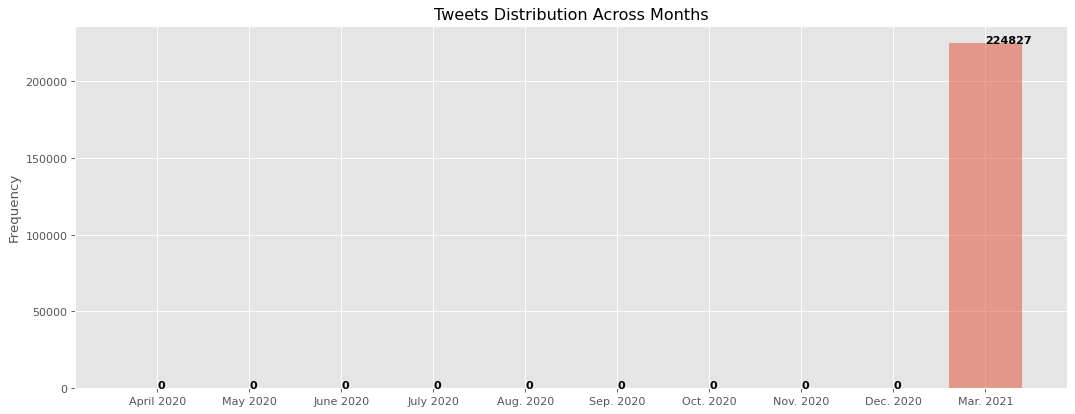

In [112]:
year_months_to_exclude = ['2021-01', '2021-02', '2020-03']
months_titles = ["April 2020", "May 2020", "June 2020", "July 2020",
                 "Aug. 2020", "Sep. 2020", "Oct. 2020", "Nov. 2020", "Dec. 2020", "Mar. 2021"]
get_tweets_distribution(q1_dataset, year_months_to_exclude, months_titles)

Get hashtag frequency graph

covid19                    6970
remotework                 2316
remote                     2058
stayathome                 1700
jobs                       1674
job                        1614
remotejobs                 1566
remoteworking              1348
workfromhome               1171
workathome                 1151
wfh                        1115
digitalnomad               1091
home                       1065
techjobs                    941
nomad                       859
covid                       810
assignment                  788
javascript                  663
whatshappeninginmyanmar     641
mar26coup                   595
dtype: int64


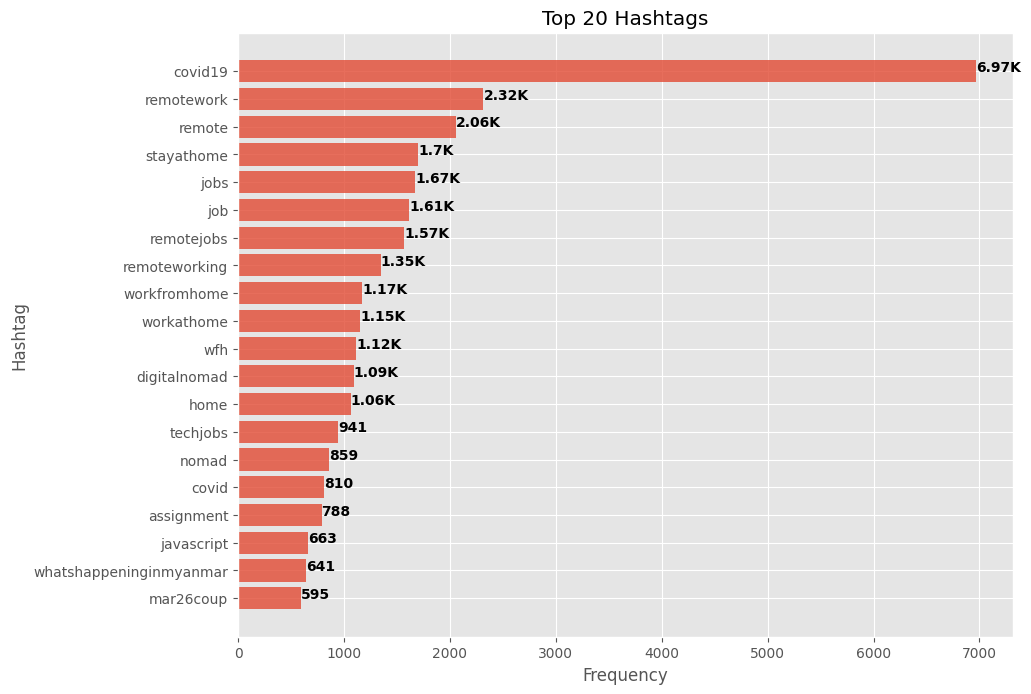

In [48]:
get_hashtag_frequency('q1_processed_dataset_hashtags.pkl')

Get word frequency graph

work       177250
home       114578
back        56745
office      32788
time        24503
meeting     21838
zoom        20179
people      18624
need        17467
like        16711
remote      16436
go          16384
make        15937
come        14742
year        13314
take        12806
want        12060
today       11573
start       11326
look        10315
dtype: int64


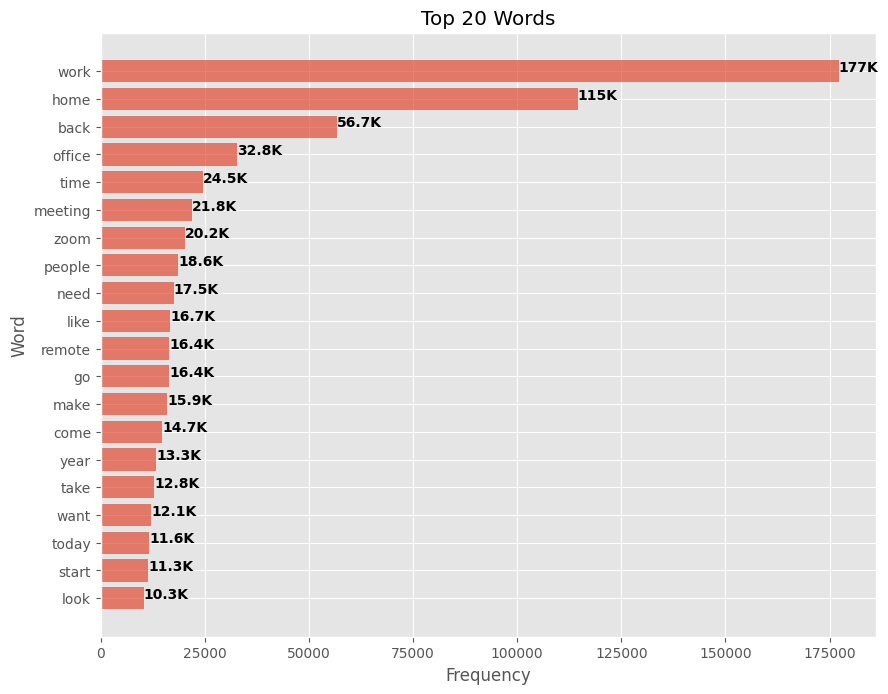

In [54]:
get_word_frequency(q1_dataset, "q1_dataset")

Get pre-processing effects on tweets length before and after data cleaning and preprocessing

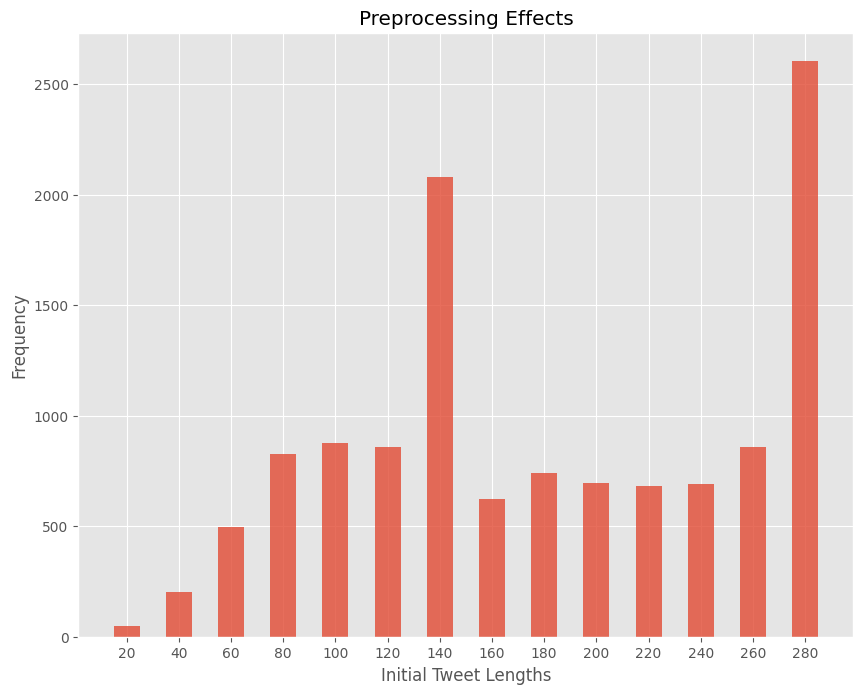

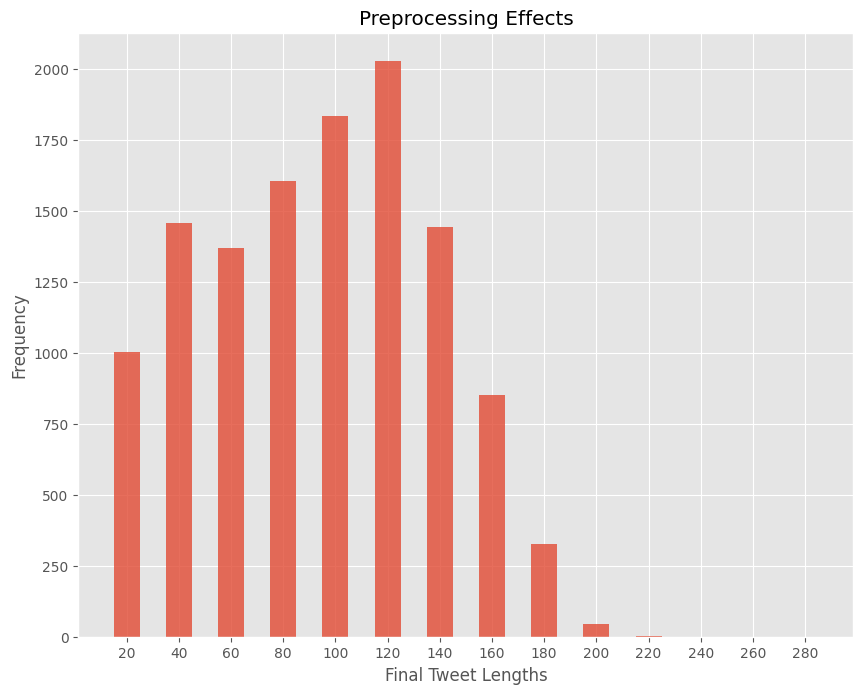

In [50]:
# Before
get_tweets_length(q1_dataset, 'text')

# After
get_tweets_length(q1_dataset, 'clean_text')

Get word cloud

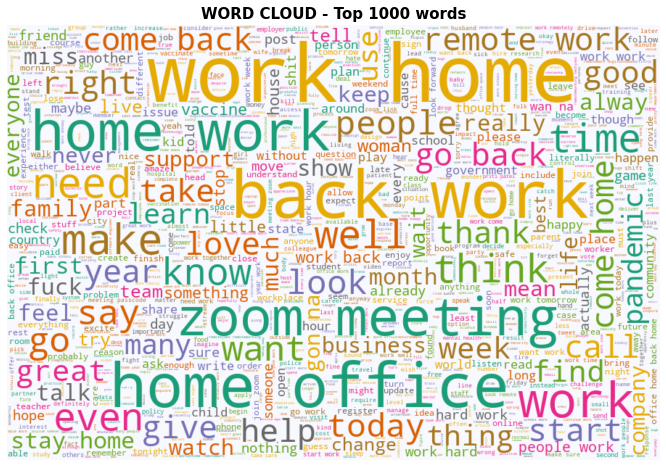

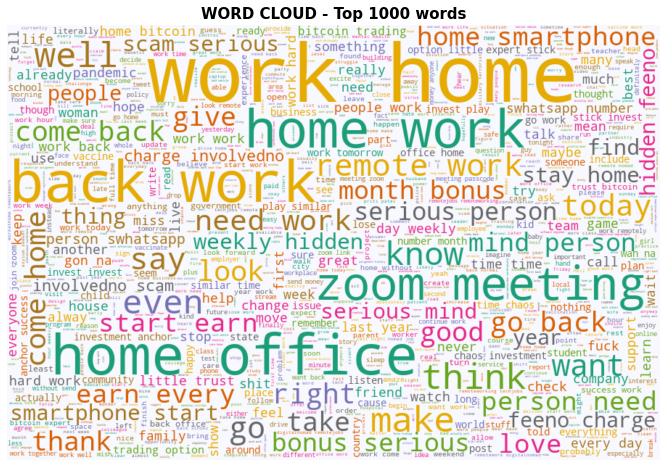

In [51]:
# Unique
get_word_cloud(q1_dataset, unique_tweets=True)

# Not Unique
get_word_cloud(q1_dataset)

## Question 2 Visualizations

Descriptive statistics before and after data cleaning and preprocessing

In [55]:
# Before
compute_stats(q2_dataset_copy, "text")
print('\n')
# After
compute_stats(q2_dataset, "clean_text")

Total No. of Tweets      : 826611
Total No. of Words       : 25729621
Total No. of Characters  : 110307726
No. Words/Tweet          :  31.13
No. Characters/Tweet     :  133.45


Total No. of Tweets      : 633886
Total No. of Words       : 6927348
Total No. of Characters  : 40772628
No. Words/Tweet          :  10.93
No. Characters/Tweet     :  64.32


Get tweets distribution across the months

{'2020-03': 2776, '2020-04': 30, '2020-05': 105, '2020-06': 86, '2020-07': 77, '2020-08': 52, '2020-09': 52, '2020-10': 55, '2020-11': 65, '2020-12': 66, '2021-01': 0, '2021-02': 0, '2021-03': 628998}
9


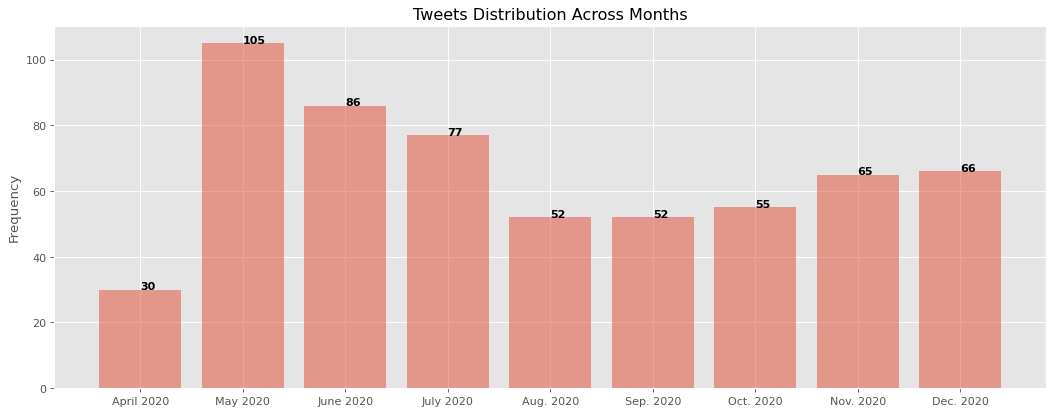

In [114]:
year_months_to_exclude = ['2021-01', '2021-02', "2021-03", '2020-03']
months_titles = ["April 2020", "May 2020", "June 2020", "July 2020",
                 "Aug. 2020", "Sep. 2020", "Oct. 2020", "Nov. 2020", "Dec. 2020"]
get_tweets_distribution(q2_dataset, year_months_to_exclude, months_titles)


Get hashtag frequency graph

covid               43739
covid19             26153
lockdown2021        11950
lockdown             9717
coronavirus          9006
socialdistancing     3928
dayofreflection      3047
staysafe             2917
wearamask            2899
stayhome             2732
washyourhands        2552
vaccine              2447
quarantine           1960
pandemic             1939
breaking             1660
corona               1597
stayathome           1504
covid_19             1480
covidー19             1436
haierxgulf           1411
dtype: int64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


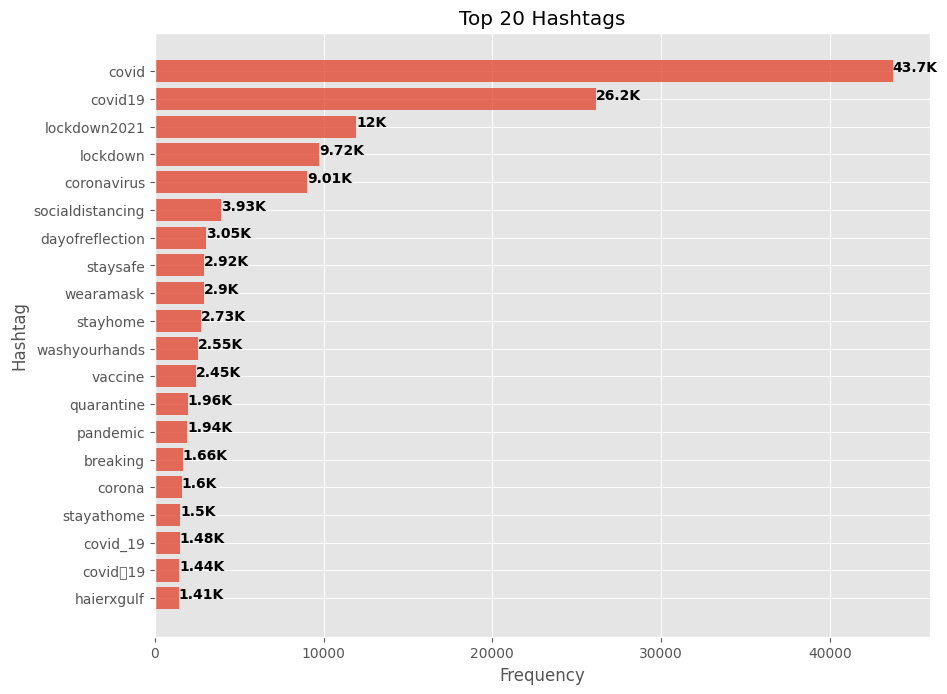

In [57]:
get_hashtag_frequency('q2_processed_dataset_hashtags.pkl')

Get word frequency graph

mask           213334
wear           174135
enforce        173225
year           123041
say            115055
restriction    110286
like           105933
school         100681
social          92081
distance        90178
kid             89109
cover           87955
girl            86132
people          68376
rule            59257
vaccine         35882
take            32266
travel          29501
home            28029
come            26486
dtype: int64


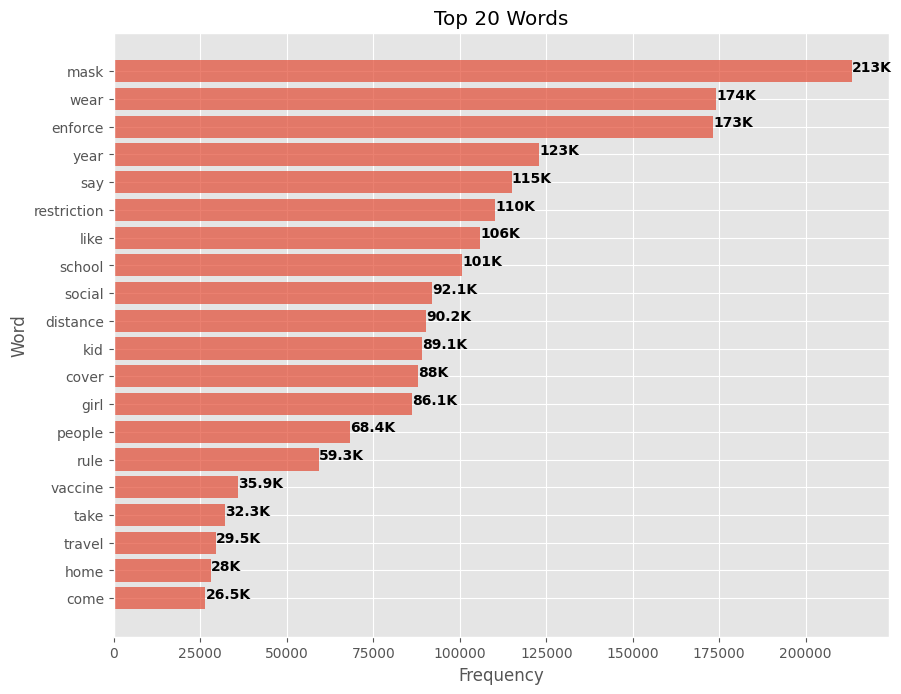

In [58]:
get_word_frequency(q2_dataset, "q2_dataset")

Get pre-processing effects on tweets length before and after data cleaning and preprocessing

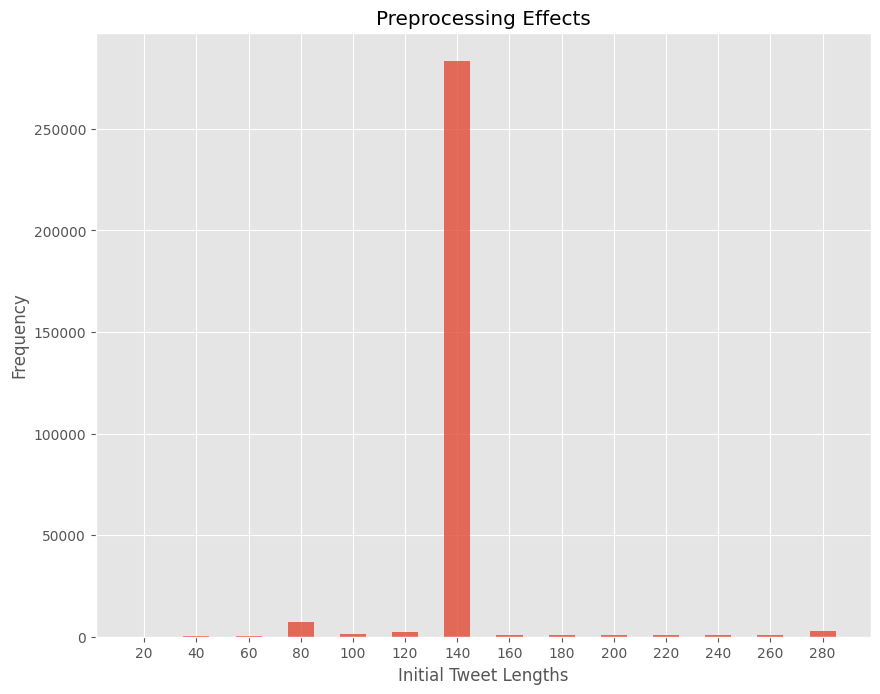

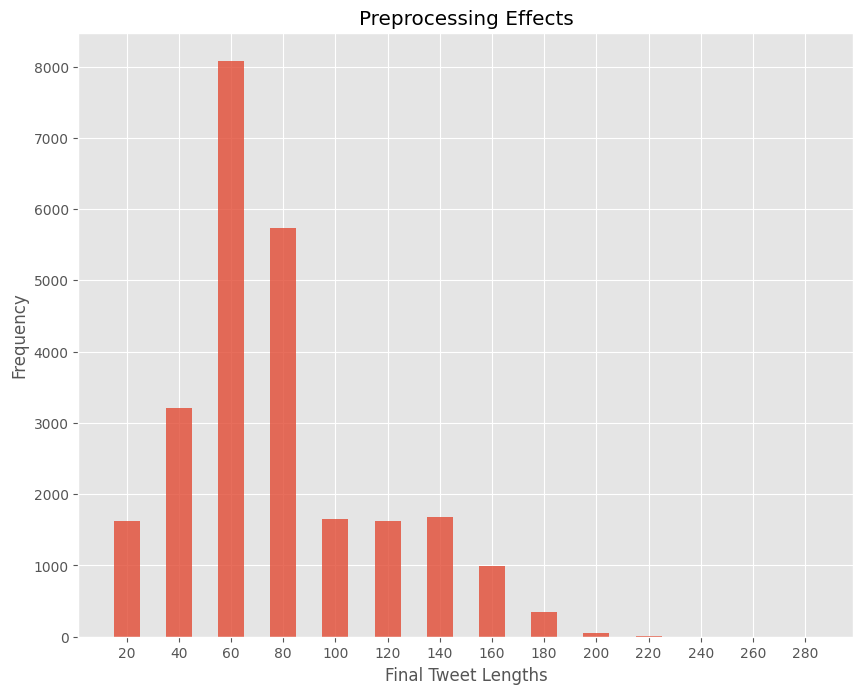

In [59]:
# Before
get_tweets_length(q2_dataset, 'text')

# After
get_tweets_length(q2_dataset, 'clean_text')

Get word cloud

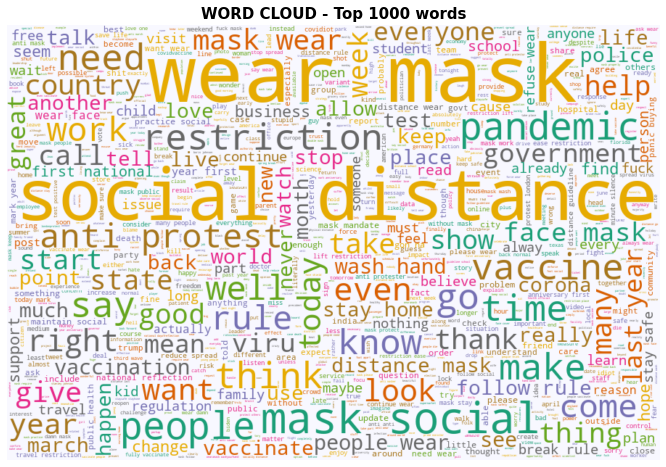

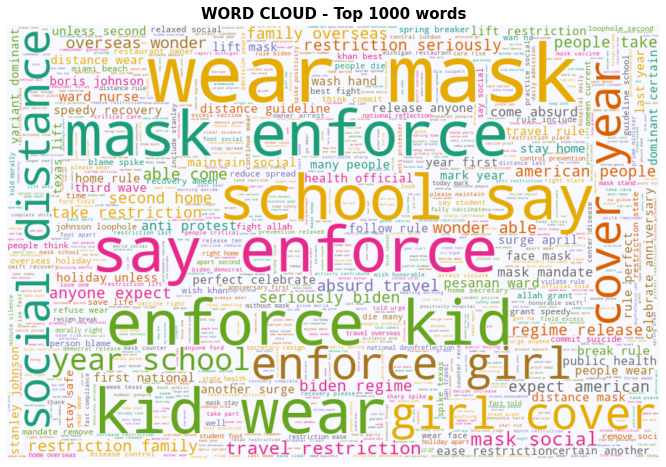

In [60]:
# Unique
get_word_cloud(q2_dataset, unique_tweets=True)

# Not Unique
get_word_cloud(q2_dataset)

## Question 3 Visualizations

Descriptive statistics before and after data cleaning and preprocessing

In [61]:
# Before
compute_stats(q3_dataset_copy, "text")
print('\n')
# After
compute_stats(q3_dataset, "clean_text")

Total No. of Tweets      : 63647
Total No. of Words       : 2207168
Total No. of Characters  : 10284214
No. Words/Tweet          :  34.68
No. Characters/Tweet     :  161.58


Total No. of Tweets      : 54684
Total No. of Words       : 673903
Total No. of Characters  : 4085254
No. Words/Tweet          :  12.32
No. Characters/Tweet     :  74.71


Get tweets distribution across the months

{'2020-03': 0, '2020-04': 0, '2020-05': 0, '2020-06': 0, '2020-07': 0, '2020-08': 0, '2020-09': 0, '2020-10': 0, '2020-11': 0, '2020-12': 0, '2021-01': 0, '2021-02': 0, '2021-03': 54684}
10


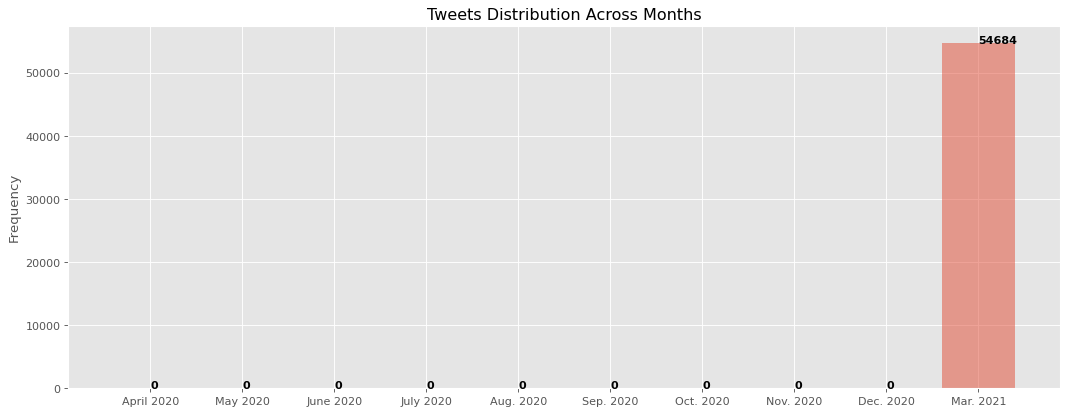

In [113]:
year_months_to_exclude = ['2021-01', '2021-02', '2020-03']
months_titles = ["April 2020", "May 2020", "June 2020", "July 2020",
                 "Aug. 2020", "Sep. 2020", "Oct. 2020", "Nov. 2020", "Dec. 2020", "Mar. 2021"]
get_tweets_distribution(q3_dataset, year_months_to_exclude, months_titles)

Get hashtag frequency graph

lockdown                   2997
stayhome                   2893
wfh                        2769
covid19                    2336
lockdown2021               1950
covid                      1419
workingfromhome            1033
staysafe                    860
coronavirus                 850
dayofreflection             494
nationaldayofreflection     472
lockdownanniversary         464
nowplaying                  374
covidã                      359
listenlive                  358
remotework                  331
workfromhome                325
covid_19                    301
covid19uk                   300
pandemic                    293
dtype: int64


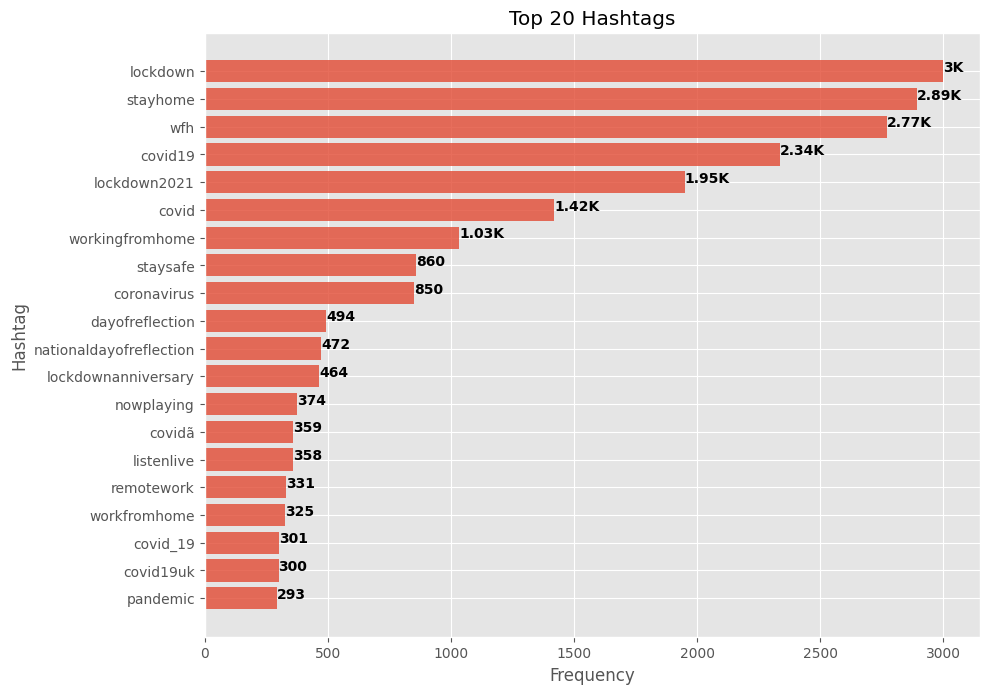

In [63]:
get_hashtag_frequency('q3_processed_dataset_hashtags.pkl')

Get word frequency graph

year        9488
anti        5670
people      5667
first       4979
work        4077
go          3664
like        3620
since       3580
time        3570
make        3073
today       3053
protest     3047
stayhome    3000
home        2943
case        2869
last        2691
pandemic    2669
life        2635
need        2580
back        2569
dtype: int64


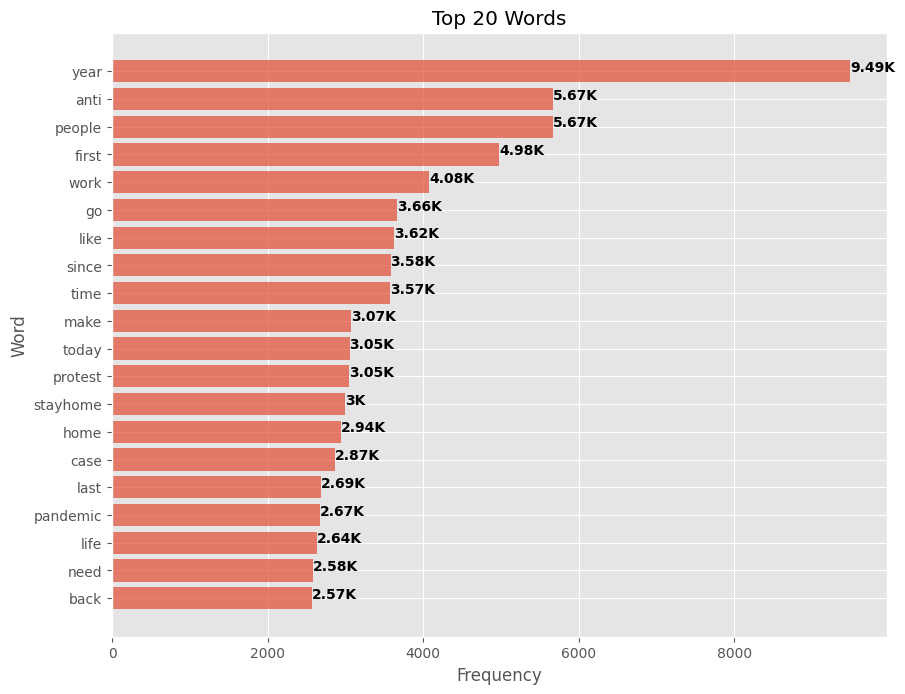

In [65]:
get_word_frequency(q3_dataset, "q3_dataset")

Get pre-processing effects on tweets length before and after data cleaning and preprocessing

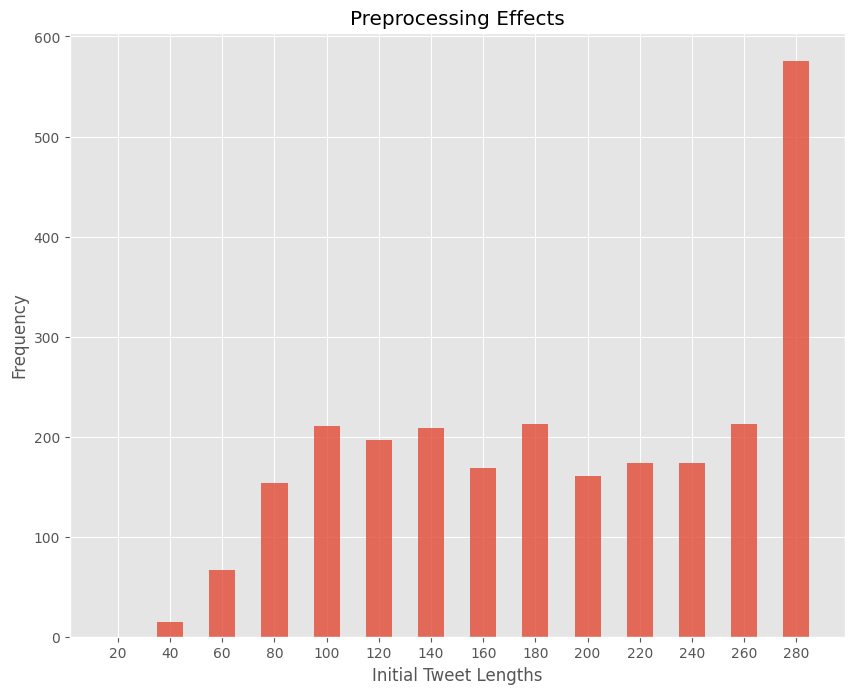

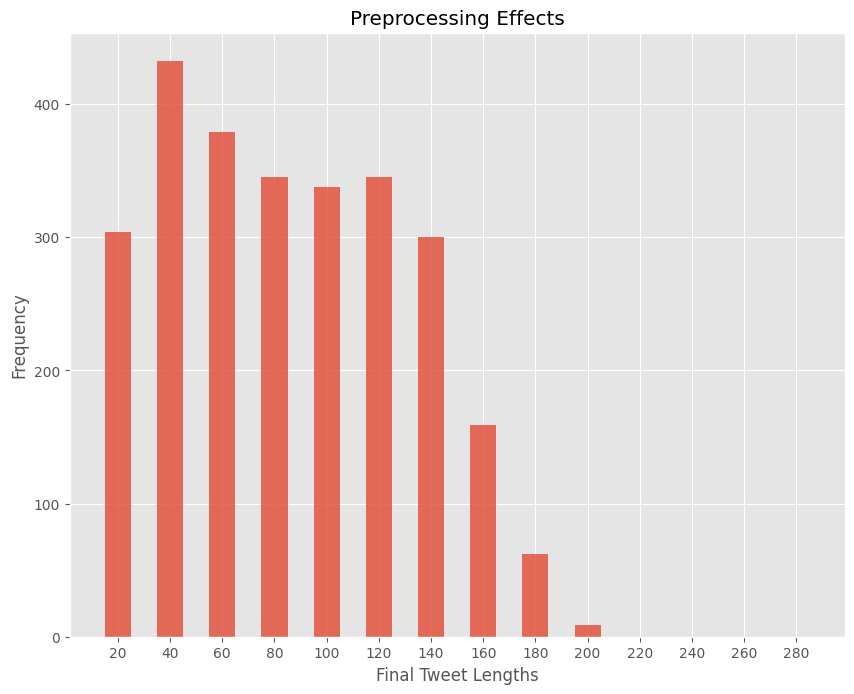

In [66]:
# Before
get_tweets_length(q3_dataset, 'text')

# After
get_tweets_length(q3_dataset, 'clean_text')

Get word cloud

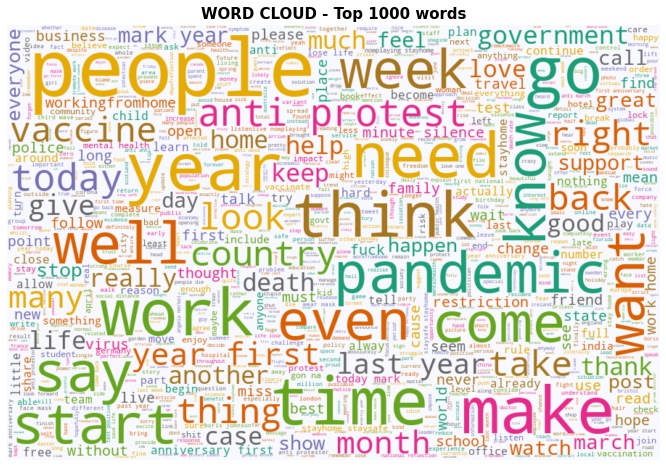

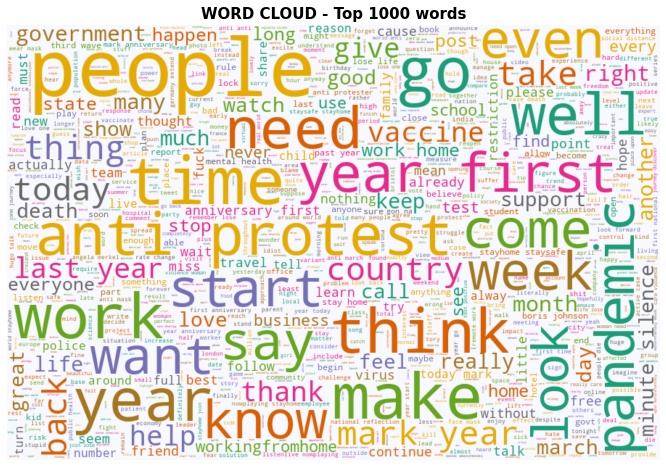

In [67]:
# Unique
get_word_cloud(q3_dataset, unique_tweets=True)

# Not Unique
get_word_cloud(q3_dataset)

# Topic Modelling


---



In [68]:
stop_words = stopwords.words('english')

# Do you want to modify this by adding more stop words?
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'nan'])

In [69]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) 
    if word not in stop_words] for doc in texts]

In [117]:
corpus_global = []
def apply_topic_modelling(dataset, dataset_name, num_of_topics):

  if isinstance(dataset, str):
    dataset = pd.read_csv(dataset, quotechar='"', encoding='utf8', lineterminator='\n')
    
  data = dataset.clean_text.values.tolist()
  data_words = list(sent_to_words(data))

  # Remove stop words
  data_words = remove_stopwords(data_words)

  # Create a dictionary
  id2word = corpora.Dictionary(data_words)

  # Create a corpus
  texts = data_words

  # convert the corpus into a BoW representation
  corpus = [id2word.doc2bow(text) for text in texts]
  global corpus_global 
  corpus_global = corpus

  # set number of topics
  num_topics = num_of_topics

  # build an LDA model
  lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

  # print keywords in each topic
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)

  # Save topics and visualize
  LDAvis_data_filepath = os.path.join(f'./{dataset_name}_' + str(num_topics) + '_topics.pkl')

  LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
  with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

  with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

  pyLDAvis.save_html(LDAvis_prepared, f'./{dataset_name}_' + str(num_topics) + "_topics" +'.html')

  print(LDAvis_prepared)
  return lda_model


In [78]:

# What are the Dominant topics ?
# Percentage contribution of topics in each document
def get_dominant_topics(ldamodel, corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4),
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    return sent_topics_df



> <font color="#c41f3b"> **NOTE**: </font>
In the following results, along with the topics we also show case the **coherence score**, which measures the relative distance between words within a topic the higher the better but usually a score of 0.9+ either mean words are identical or bigrams.

## Question 1 Topics



In [116]:
q1_lda_model = apply_topic_modelling(q1_dataset, 'q1_dataset', 5)

[(0,
  '0.056*"work" + 0.017*"home" + 0.015*"people" + 0.015*"help" + '
  '0.010*"support" + 0.010*"care" + 0.007*"vaccine" + 0.006*"safe" + '
  '0.006*"pandemic" + 0.006*"well"'),
 (1,
  '0.048*"remote" + 0.033*"success" + 0.020*"investment" + 0.018*"expert" + '
  '0.018*"great" + 0.016*"trust" + 0.016*"team" + 0.015*"opportunity" + '
  '0.013*"option" + 0.013*"security"'),
 (2,
  '0.054*"meeting" + 0.053*"zoom" + 0.036*"join" + 0.016*"free" + '
  '0.014*"please" + 0.014*"register" + 0.012*"invest" + 0.012*"similar" + '
  '0.011*"trading" + 0.011*"great"'),
 (3,
  '0.076*"office" + 0.072*"home" + 0.011*"work" + 0.010*"person" + '
  '0.010*"serious" + 0.010*"need" + 0.008*"earn" + 0.006*"money" + '
  '0.006*"bonus" + 0.006*"scam"'),
 (4,
  '0.092*"work" + 0.048*"home" + 0.042*"back" + 0.018*"like" + 0.013*"love" + '
  '0.012*"good" + 0.011*"time" + 0.010*"want" + 0.009*"well" + 0.008*"come"')]

Coherence Score:  0.40303981912422665
PreparedData(topic_coordinates=              x        

## Question 2 Topics



In [118]:
q2_lda_model = apply_topic_modelling(q2_dataset, 'q2_dataset', 15)

[(0,
  '0.129*"recovery" + 0.080*"party" + 0.045*"allow" + 0.039*"family" + '
  '0.026*"hard" + 0.024*"overseas" + 0.024*"others" + 0.022*"travel" + '
  '0.021*"johnson" + 0.016*"age"'),
 (1,
  '0.071*"take" + 0.066*"safety" + 0.050*"long" + 0.037*"feel" + 0.032*"give" '
  '+ 0.029*"child" + 0.029*"people" + 0.027*"risk" + 0.022*"show" + '
  '0.018*"count"'),
 (2,
  '0.108*"house" + 0.094*"return" + 0.060*"face" + 0.058*"thousand" + '
  '0.034*"reason" + 0.030*"word" + 0.025*"wall" + 0.018*"night" + '
  '0.018*"attend" + 0.017*"several"'),
 (3,
  '0.107*"please" + 0.106*"social" + 0.104*"distance" + 0.061*"wish" + '
  '0.042*"safe" + 0.041*"good" + 0.038*"great" + 0.037*"stop" + 0.024*"well" + '
  '0.024*"spread"'),
 (4,
  '0.350*"restriction" + 0.077*"number" + 0.058*"current" + 0.034*"come" + '
  '0.025*"lift" + 0.021*"week" + 0.020*"state" + 0.016*"relax" + 0.016*"break" '
  '+ 0.012*"extend"'),
 (5,
  '0.082*"right" + 0.049*"live" + 0.043*"business" + 0.040*"another" + '
  '0.038*"

## Question 3 Topics



In [119]:
q3_lda_model = apply_topic_modelling(q3_dataset, 'q3_dataset', 30)

# print keywords in each topic
q3_lda_model.show_topics(30)

[(5,
  '0.024*"book" + 0.021*"hotel" + 0.020*"business" + 0.017*"morning" + '
  '0.015*"close" + 0.015*"flight" + 0.013*"cybersecurity" + 0.013*"make" + '
  '0.012*"start" + 0.012*"good"'),
 (24,
  '0.037*"isolation" + 0.021*"survey" + 0.013*"training" + 0.012*"bore" + '
  '0.012*"schedule" + 0.011*"work" + 0.009*"right" + 0.009*"island" + '
  '0.008*"public" + 0.008*"home"'),
 (10,
  '0.034*"learn" + 0.027*"tomorrow" + 0.022*"hair" + 0.022*"job" + '
  '0.021*"need" + 0.021*"employment" + 0.020*"game" + 0.018*"least" + '
  '0.017*"option" + 0.015*"program"'),
 (26,
  '0.020*"work" + 0.015*"thing" + 0.013*"require" + 0.013*"parent" + '
  '0.010*"good" + 0.009*"back" + 0.009*"pretty" + 0.008*"even" + '
  '0.008*"remotely" + 0.008*"like"'),
 (16,
  '0.024*"productive" + 0.022*"security" + 0.021*"listen" + 0.020*"trend" + '
  '0.017*"song" + 0.016*"podcast" + 0.012*"work" + 0.012*"earn" + '
  '0.011*"memory" + 0.011*"offer"'),
 (25,
  '0.076*"home" + 0.066*"work" + 0.058*"office" + 0.023*"

[(0,
  '0.035*"miss" + 0.033*"birthday" + 0.030*"meeting" + 0.029*"feel" + 0.021*"second" + 0.021*"much" + 0.020*"like" + 0.019*"rule" + 0.019*"idea" + 0.019*"make"'),
 (1,
  '0.056*"happy" + 0.036*"experience" + 0.032*"space" + 0.030*"late" + 0.022*"international" + 0.018*"corona" + 0.016*"connect" + 0.015*"update" + 0.014*"dream" + 0.014*"fill"'),
 (2,
  '0.022*"work" + 0.021*"anywhere" + 0.019*"long" + 0.019*"cloud" + 0.016*"end" + 0.015*"term" + 0.014*"back" + 0.013*"hire" + 0.013*"radio" + 0.013*"view"'),
 (3,
  '0.041*"finally" + 0.031*"review" + 0.027*"allow" + 0.024*"arrive" + 0.022*"ease" + 0.019*"third" + 0.018*"announce" + 0.017*"wave" + 0.013*"break" + 0.012*"restriction"'),
 (4,
  '0.029*"live" + 0.026*"healthy" + 0.025*"future" + 0.020*"take" + 0.019*"today" + 0.016*"software" + 0.015*"remember" + 0.015*"people" + 0.014*"moment" + 0.013*"time"'),
 (5,
  '0.024*"book" + 0.021*"hotel" + 0.020*"business" + 0.017*"morning" + 0.015*"close" + 0.015*"flight" + 0.013*"cybersecuri

In [83]:
dominant_topics_df = get_dominant_topics(q3_lda_model, corpus_global)
dominant_topics_df.head(10)

Dominant_Topic  ...                                     Topic_Keywords
0            20.0  ...  test, learn, positive, environment, talk, cana...
1            11.0  ...  negative, room, session, cost, play, leader, v...
2            21.0  ...  work, online, time, ready, right, hand, improv...
3            29.0  ...  people, day, work, know, test, need, managemen...
4            16.0  ...  video, zoom, tomorrow, move, second, today, te...
5            21.0  ...  work, online, time, ready, right, hand, improv...
6             8.0  ...  year, happy, birthday, feel, last, time, best,...
7            15.0  ...  post, challenge, blog, year, late, offer, lapt...
8            16.0  ...  video, zoom, tomorrow, move, second, today, te...
9            29.0  ...  people, day, work, know, test, need, managemen...

[10 rows x 3 columns]

In [84]:
num_text = len(dominant_topics_df)
num_dominant = dict()

for topic_idx in dominant_topics_df.Dominant_Topic.tolist():
  if topic_idx in num_dominant:
    num_dominant[topic_idx] += 1
  else:
    num_dominant[topic_idx] = 1

dominant_topics = [(topic_idx, num) for topic_idx, num in num_dominant.items()]
dominant_topics_sorted = sorted(dominant_topics, key=lambda x: x[1], reverse=True)
dominant_topics_sorted

[(29.0, 4550),
 (18.0, 4048),
 (8.0, 3495),
 (17.0, 2983),
 (4.0, 2415),
 (19.0, 2318),
 (21.0, 2300),
 (1.0, 2173),
 (20.0, 2106),
 (13.0, 2095),
 (27.0, 2018),
 (28.0, 1897),
 (25.0, 1827),
 (3.0, 1616),
 (11.0, 1521),
 (24.0, 1482),
 (12.0, 1427),
 (26.0, 1364),
 (2.0, 1313),
 (9.0, 1262),
 (16.0, 1202),
 (14.0, 1184),
 (0.0, 1162),
 (10.0, 1088),
 (7.0, 1055),
 (5.0, 1042),
 (15.0, 1022),
 (6.0, 1015),
 (23.0, 944),
 (22.0, 760)]

In [85]:
dominant_topics_list = []
for topic_idx, num in dominant_topics_sorted:
  topic_idx = int(topic_idx)
  pcent = round(num/num_text * 100, 2)
  dominant_topics_list.append((topic_idx, num, str(pcent)+'%'))

dominant_topics_df = pd.DataFrame(data=dominant_topics_list)
dominant_topics_df.columns = ['Topic_idx', 'Num of tweets', 'Perc_Contribution']
dominant_topics_df

Topic_idx  Num of tweets Perc_Contribution
0          29           4550             8.32%
1          18           4048              7.4%
2           8           3495             6.39%
3          17           2983             5.45%
4           4           2415             4.42%
5          19           2318             4.24%
6          21           2300             4.21%
7           1           2173             3.97%
8          20           2106             3.85%
9          13           2095             3.83%
10         27           2018             3.69%
11         28           1897             3.47%
12         25           1827             3.34%
13          3           1616             2.96%
14         11           1521             2.78%
15         24           1482             2.71%
16         12           1427             2.61%
17         26           1364             2.49%
18          2           1313              2.4%
19          9           1262             2.31%
20         16           1202              2.2%
21         14           1184             2.17%
22          0           1162             2.12%
23         10           1088             1.99%
24          7           1055             1.93%
25          5           1042             1.91%
26         15           1022             1.87%
27          6           1015             1.86%
28         23            944             1.73%
29         22            760             1.39%

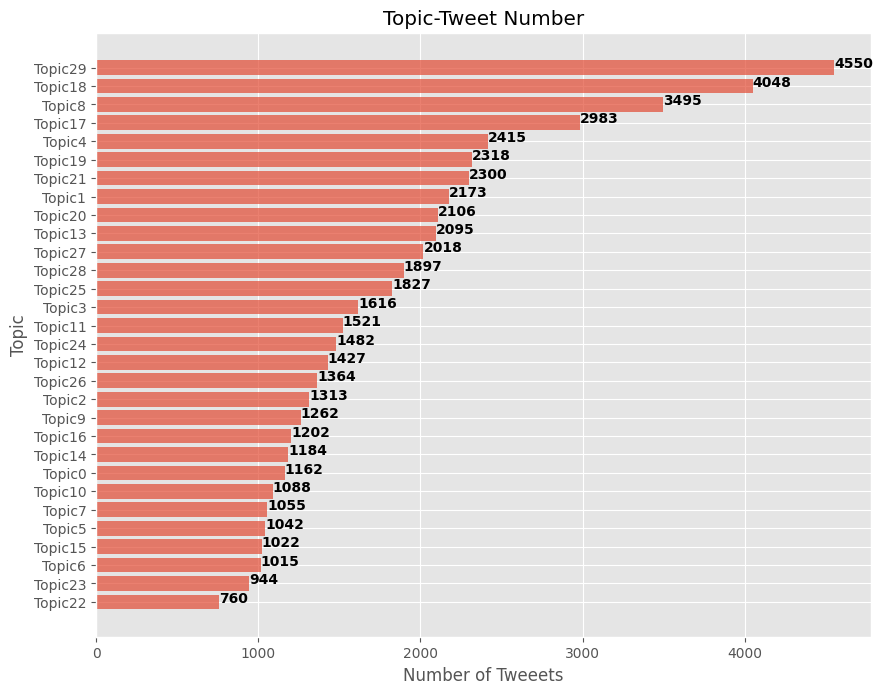

In [86]:
topic_idx = dominant_topics_df.Topic_idx.tolist()
topic_idx = ['Topic' + str(i) for i in topic_idx]
topic_tweet_num = dominant_topics_df['Num of tweets'].tolist()

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
for index, value in enumerate(topic_tweet_num):
    ax.text(value, index, value, color='black', fontweight='bold')

ax.barh(topic_idx, topic_tweet_num, align='center', alpha=0.7)

plt.title('Topic-Tweet Number')
plt.xlabel('Number of Tweeets')
plt.ylabel('Topic')
plt.gca().invert_yaxis()
plt.show()

# Sentiment Analysis


---



In [91]:
def apply_sentiment_analysis(dataset):
  analyzer = SentimentIntensityAnalyzer()

  if isinstance(dataset, str):
    dataset = pd.read_csv(dataset, quotechar='"', encoding='utf8', lineterminator='\n')

  negative = []
  neutral = []
  positive = []
  compound = []

  # Sentiment Scores
  for tweet_text in dataset['clean_text']:
    sentiment_dict = analyzer.polarity_scores(tweet_text)
    negative.append(sentiment_dict['neg'])
    neutral.append(sentiment_dict['neu'])
    positive.append(sentiment_dict['pos'])
    compound.append(sentiment_dict['compound'])
  
  #Using our  preprocessed dataset dataframe, we add new columns
  #and fill them with the sentiments.
  dataset["negative"] = negative
  dataset["neutral"] = neutral
  dataset["positive"] = positive
  dataset["compound"] = compound

  sentiment = []
  no_of_negatives = 0
  no_of_positives = 0
  no_of_neutral = 0
  for j in dataset["compound"]:
      if j >= 0.05:
          sentiment.append(1)
          no_of_positives += 1
      elif j <= -0.05:
          sentiment.append(-1)
          no_of_negatives += 1
      else:
          sentiment.append(0)
          no_of_neutral += 1

  dataset['sentiment'] = sentiment

  #Calculating the perceptage of each sentiment
  print(no_of_negatives / len(negative))
  print(no_of_positives / len(negative))
  print(no_of_neutral / len(negative))
  print(dataset)

  #Top 5 negative tweets
  dataset.sort_values(by=['negative'], inplace=True, ascending=False)
  print(dataset.head(5))

  #Top 5 positive tweets
  dataset.sort_values(by=['positive'], inplace=True, ascending=False)
  print(dataset.head(5))

  #Top 5 Neutral tweets
  dataset.sort_values(by=['neutral'], inplace=True, ascending=False)
  dataset.head(5)

  return dataset

import matplotlib as mpl
mpl.rcParams['font.size'] = 17
def visualise_sentiments(dataset_df):

  y = dataset_df.groupby(dataset_df['sentiment'])['sentiment'].count()

  mylabels    = ["negative", "neutral", "positive"]
  mycolors    = ["red", "yellow", "green"]
  myexplode   = [0.1, 0, 0.1]

  figure(figsize=(8, 8))
  plt.pie(y, labels=mylabels, explode=myexplode, shadow=True, colors=mycolors, autopct='%1.1f%%')
  plt.legend(title="Sentiments", loc='lower left')
  plt.show() 


## Question 1 Sentiments

0.2298211513741677
0.5395392902098057
0.23063955841602654
                       date             user  ... compound sentiment
64886   2021-03-23 20:30:00  _workingmother_  ...   0.0000         0
58560   2021-03-26 16:43:53         HansLind  ...   0.0000         0
25729   2021-03-24 02:53:01    Beth_Kern_2_0  ...   0.0000         0
13772   2021-03-26 17:00:31       geekanoids  ...   0.0000         0
12560   2021-03-26 21:35:30     alanbullion2  ...   0.0000         0
...                     ...              ...  ...      ...       ...
12133   2021-03-27 00:05:28      GingerMedia  ...   0.8316         1
135159  2021-03-27 15:16:07        QueenG719  ...   0.8591         1
57945   2021-03-26 22:46:12       HannahSung  ...   0.9413         1
11258   2021-03-27 08:19:07           sthen0  ...  -0.8750        -1
12751   2021-03-26 20:44:53         oilmoon1  ...   0.9612         1

[224827 rows x 13 columns]
                       date            user  ... compound sentiment
176056  2021-03-28

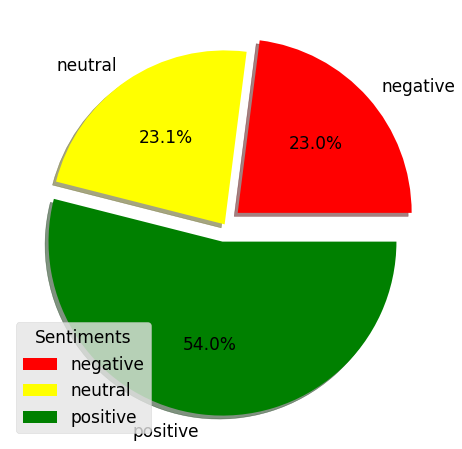

In [94]:
q1_dataset  = apply_sentiment_analysis(q1_dataset)
visualise_sentiments(q1_dataset)

## Question 2 Sentiments

0.34922525501430857
0.4701208103665328
0.18065393461915866
                       date             user  ... compound sentiment
0       2021-03-22 21:25:46     Alt_Bristol_  ...   0.0772         1
1       2021-03-21 18:44:47      OpenParlyZw  ...  -0.1779        -1
2       2021-03-21 10:43:12    steve_hofmeyr  ...   0.4404         1
3       2021-03-24 18:30:52         peglyn58  ...   0.2023         1
4       2021-03-23 15:14:25    mercadomagico  ...   0.6597         1
...                     ...              ...  ...      ...       ...
633881  2021-03-24 19:10:08    CoryMorrisesq  ...   0.2732         1
633882  2021-03-24 19:10:07       Nadine_Mov  ...  -0.4340        -1
633883  2021-03-24 19:10:04    JRsagittarius  ...   0.0000         0
633884  2021-03-24 19:10:03         labs_kai  ...   0.8481         1
633885  2021-03-24 19:09:49  RadioAmericaNet  ...  -0.8779        -1

[633886 rows x 13 columns]
                      date            user  ... compound sentiment
23751  2021-03-20 

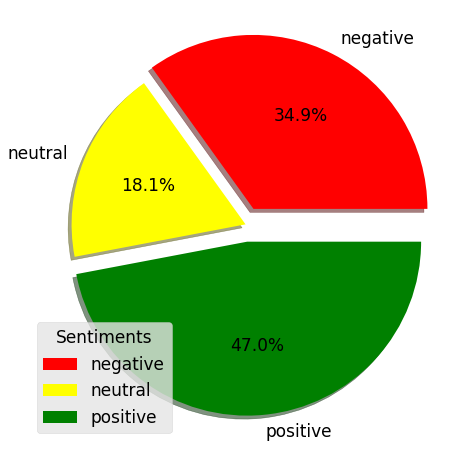

In [93]:
q2_dataset  = apply_sentiment_analysis(q2_dataset)
visualise_sentiments(q2_dataset)